In [1]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

import os
import pickle

In [2]:
def plotCross(data, ax):
    import seaborn as sns
    plot_df = data
    plot_df_order = ['nectary-body', 'nectary-pilifer', 'pilifer-body']  # desired order of columns
    df_ordered = plot_df[plot_df_order]
     
    # Convert DataFrame to long format for Seaborn
    df_ordered_long = df_ordered.melt(var_name='input-output pairs', value_name='Xcorr')
 
    sns.boxplot(x='input-output pairs', y='Xcorr', data=df_ordered_long, palette="pastel", ax = ax)
    sns.stripplot(x='input-output pairs', y='Xcorr', data=df_ordered_long, color='red', size=6, jitter=True, alpha=0.7, ax = ax)

## Plot cross corelation values across all moths

In [3]:
df = pd.read_csv('./dataFolder/TrackingData_2022_11_10/ErrorAngle/CrossCor/' + 'allmoths.csv', header = [0,1], index_col=0)

In [4]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
split_index = df.index.to_series().str.split('_', n=1, expand=True)
split_index.columns = ['condition', 'mothID']
# new_df = pd.concat([split_index, df], axis=1)
df.index = df.index = pd.MultiIndex.from_frame(split_index)

In [5]:
df = df.dropna()
df

nectary-pilifer                     pilifer-body  \
                           maxAtZero       max delTatMax    maxAtZero   
condition mothID                                                        
MV        m11_130802        0.441696  0.482354        -6     0.504503   
          m13_130802        0.086110  0.231991       303     0.250954   
          m14_130806        0.364642  0.377714        -2     0.392951   
          m1_130802         0.578445  0.588169        -6     0.588380   
          m4_130802         0.372463  0.390183        -2     0.408774   
          m8_130805         0.389680  0.406061        -2     0.432952   
          m9_130801         0.321745  0.338690        -3     0.409588   
M         m10_130715        0.107852  0.256185       169     0.105836   
          m18_130711        0.010200 -0.249488       -68    -0.035968   
          m19_130711       -0.390433 -0.439935        11    -0.431697   
          m3_130715        -0.032808 -0.154012       167    -0.178356   
          m6_130715        -0.114721  0.249893       137    -0.077455   
          m8_130715        -0.402435 -0.411287         3    -0.254873   
          m9_130715        -0.466873 -0.487991         5    -0.243204   
V         m11_130722       -0.247146 -0.260865        -1     0.042198   
          m2_130720        -0.245966 -0.249636        -1     0.519703   
          m4_130722         0.078429 -0.258364      -123     0.619341   
          m6_130719         0.265518 -0.346406      -119     0.533965   
          m8_130719        -0.018355  0.176667       113    -0.011220   
          m9_130722        -0.047729  0.291039       103     0.263945   

                                         nectary-body                      
                           max delTatMax    maxAtZero       max delTatMax  
condition mothID                                                           
MV        m11_130802  0.508294         2     0.953120  0.971213        -3  
          m13_130802  0.272410         2     0.921068  0.941489        -3  
          m14_130806  0.412938        -3     0.921071  0.946702        -4  
          m1_130802   0.592127        -1     0.946052  0.966438        -3  
          m4_130802   0.466310        -6     0.914286  0.947615        -4  
          m8_130805   0.441954         2     0.927614  0.941749        -3  
          m9_130801   0.410602        -2     0.847413  0.863562        -3  
M         m10_130715  0.262726      -178     0.832570  0.883385        -6  
          m18_130711 -0.244585        57     0.803430  0.876691        -7  
          m19_130711 -0.582358       -12     0.825303  0.857540        -4  
          m3_130715  -0.221062      -172     0.866560  0.896585        -4  
          m6_130715   0.242639      -138     0.904647  0.945268        -5  
          m8_130715   0.380247        66     0.869963  0.927068        -6  
          m9_130715   0.490247        74     0.910046  0.942796        -4  
V         m11_130722  0.348274       318     0.096040  0.304881       -73  
          m2_130720   0.521469         1    -0.280502  0.381436      -374  
          m4_130722   0.664037         6     0.093411 -0.274173      -120  
          m6_130719   0.550410        21     0.530731  0.543969         7  
          m8_130719   0.267582       303     0.122673 -0.333116        65  
          m9_130722   0.414323        17    -0.153440  0.299601       -73

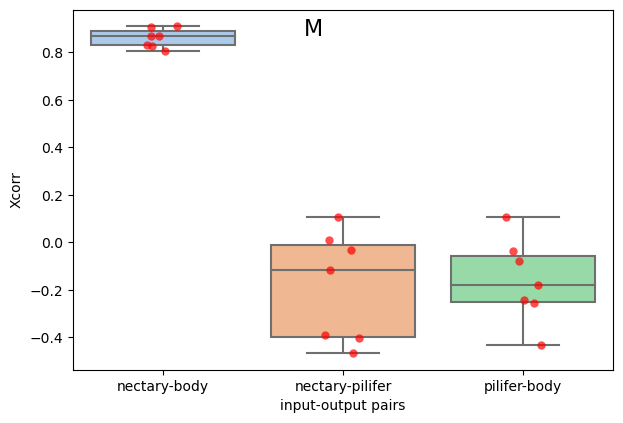

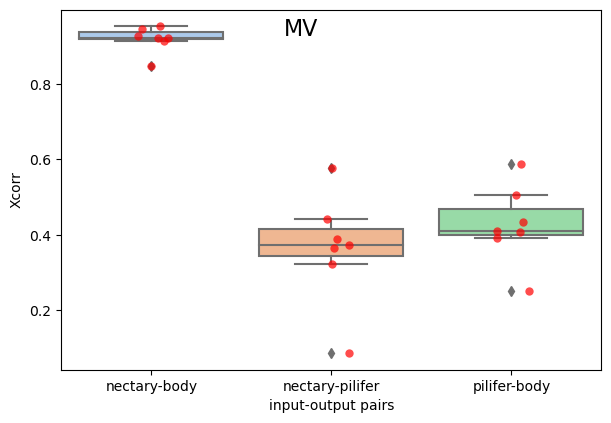

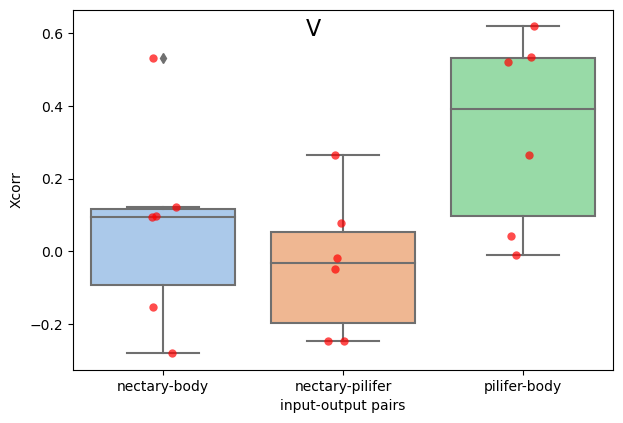

In [6]:
df_maxAtZero = df.xs('maxAtZero', level=1, axis=1)

for condition, subset in df_maxAtZero.groupby('condition'):
    subset_withoutNaN = subset.dropna().reset_index(drop=True)
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    plotCross(subset_withoutNaN,ax)
    fig.suptitle(condition, fontsize=16)
    fig.savefig('./dataFolder/TrackingData_2022_11_10/ErrorAngle/Plots/' + 'allmoths_maxAtZero_CrossCorrelation_' + condition + '.png')

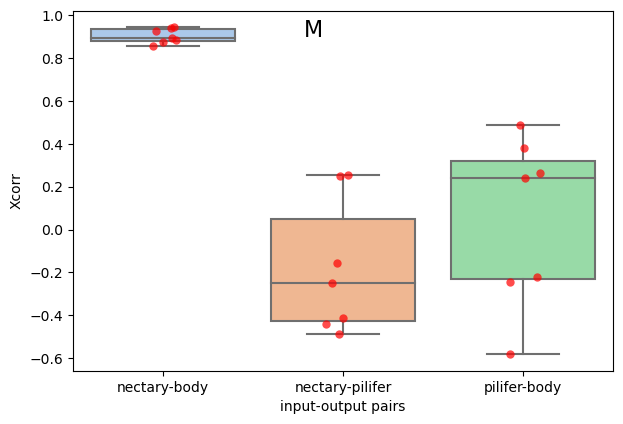

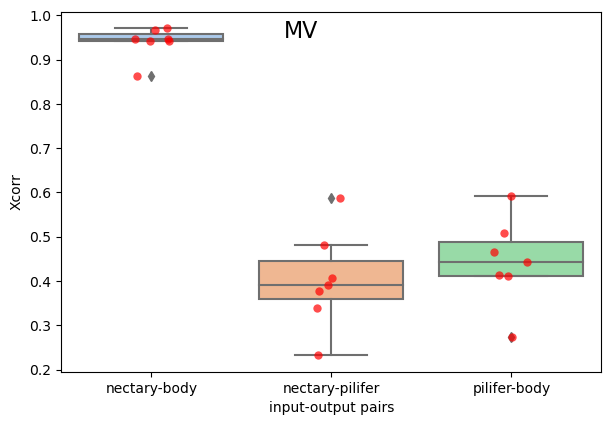

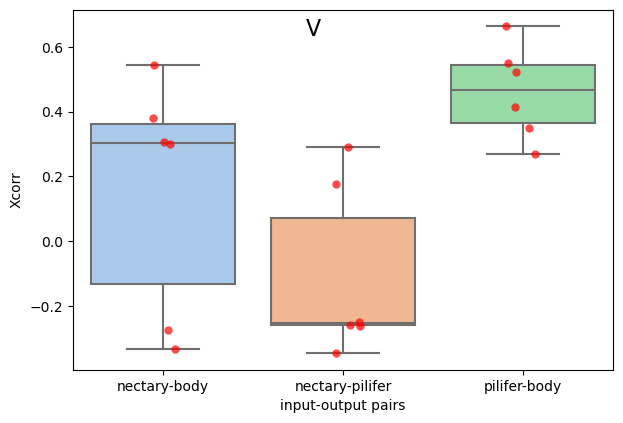

In [7]:
df_max = df.xs('max', level=1, axis=1)

for condition, subset in df_max.groupby('condition'):
    subset_withoutNaN = subset.dropna().reset_index(drop=True)
    
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    plotCross(subset_withoutNaN,ax)
    fig.suptitle(condition, fontsize=16)
    fig.savefig('./dataFolder/TrackingData_2022_11_10/ErrorAngle/Plots/' + 'allmoths_maxCrossCorrelation_' + condition + '.png')

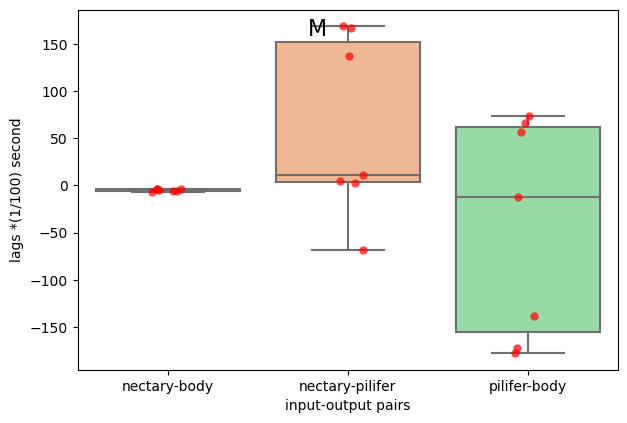

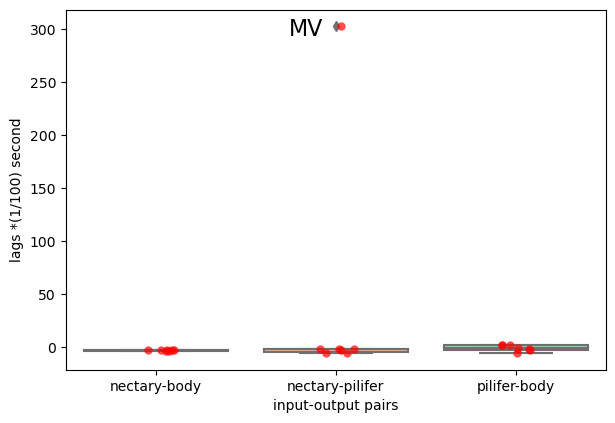

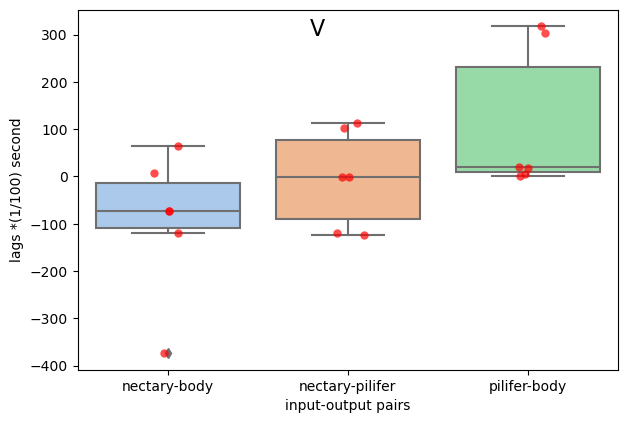

In [9]:
df_delT = df.xs('delTatMax', level=1, axis=1)

for condition, subset in df_delT.groupby('condition'):    
    subset_withoutNaN = subset.dropna().reset_index(drop=True)
    
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_axes([0.1,0.1,0.9,0.9])
    plotCross(subset_withoutNaN,ax)
    ax.set_ylabel('lags *(1/100) second')
    fig.suptitle(condition, fontsize=16)
    fig.savefig('./dataFolder/TrackingData_2022_11_10/ErrorAngle/Plots/' + 'allmoths_detTAtMaxCrossCorrelation_' + condition + '.png')